In [1]:
from pubmed_product_query import query_pubmed_monthly_normalization_dataset
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
import seaborn as sns; sns.set()


In [2]:
norm_df = query_pubmed_monthly_normalization_dataset()

Total number of publications in 2000/1: 39590
Total number of publications in 2000/2: 39544
Total number of publications in 2000/3: 48140
Total number of publications in 2000/4: 40161
Total number of publications in 2000/5: 40133
Total number of publications in 2000/6: 46544
Total number of publications in 2000/7: 38055
Total number of publications in 2000/8: 49154
Total number of publications in 2000/9: 44652
Total number of publications in 2000/10: 40228
Total number of publications in 2000/11: 40487
Total number of publications in 2000/12: 32548
Total number of publications in 2001/1: 26493
Total number of publications in 2001/2: 71530
Total number of publications in 2001/3: 51861
Total number of publications in 2001/4: 44216
Total number of publications in 2001/5: 50962
Total number of publications in 2001/6: 47198
Total number of publications in 2001/7: 44198
Total number of publications in 2001/8: 47647
Total number of publications in 2001/9: 41016
Total number of publications in

In [3]:
norm_df.to_csv("Pubmed_Normalization_df.csv", index=False)

In [4]:
norm_df = pd.read_csv("Pubmed_Normalization_df.csv")
norm_df["month"] = pd.to_datetime(
    norm_df["month"], infer_datetime_format=True
)

### Overview of Publications/Month - possibly appendix Figure

In [5]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=norm_df["month"],
        y=norm_df["pub_count"],
        name="Trace1",
        mode="lines",
        line=dict(color="rgba(4, 75, 127, 1)"),
        marker=dict(size=5, opacity=0.2),
    )
)


fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Publications on PubMed/Month",
    plot_bgcolor="rgba(0,0,0,0)",
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'rgba(4, 75, 127, 1)'},
              'marker': {'opacity': 0.2, 'size': 5},
              'mode': 'lines',
              'name': 'Trace1',
              'type': 'scatter',
              'x': array([datetime.datetime(2000, 1, 1, 0, 0),
                          datetime.datetime(2000, 2, 1, 0, 0),
                          datetime.datetime(2000, 3, 1, 0, 0), ...,
                          datetime.datetime(2022, 7, 1, 0, 0),
                          datetime.datetime(2022, 8, 1, 0, 0),
                          datetime.datetime(2022, 9, 1, 0, 0)], dtype=object),
              'y': array([ 39590,  39544,  48140, ..., 132161, 125159, 130498], dtype=int64)}],
    'layout': {'plot_bgcolor': 'rgba(0,0,0,0)',
               'template': '...',
               'xaxis': {'title': {'text': 'Date'}},
               'yaxis': {'title': {'text': 'Publications on PubMed/Month'}}}
})

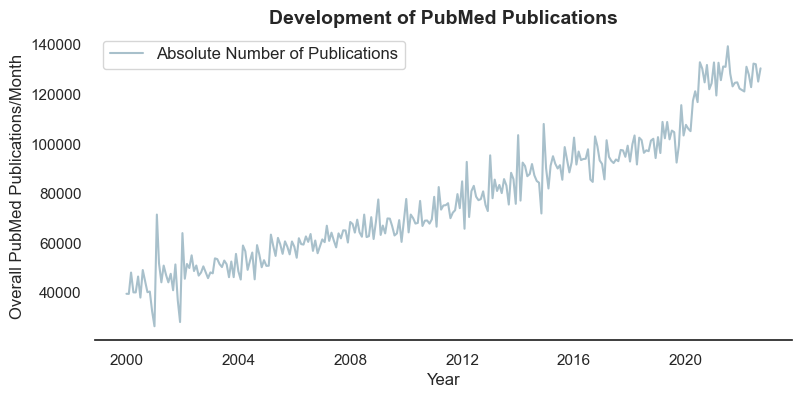

In [7]:
fig = plt.figure(figsize=(9,4))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.lineplot(ax = ax, x = norm_df.month, y= norm_df.pub_count,   
                    color ="#A8C0CB")
ax.legend(["Absolute Number of Publications"], fontsize = "medium")
handles1=  ax.get_legend().legendHandles
plt.ylabel("Overall PubMed Publications/Month")
plt.xlabel("Year")
sns.despine(left = True)




plt.title("Development of PubMed Publications", fontsize = 14, fontweight = "bold")
#plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])

plt.savefig('Graphs/PubMed_Overall_Publications.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()